In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [3]:
class KNearestNeighbors:
    def __init__(self, k, distance_metric="euclidean",weights = "uniform"):
        self.k = k
        self.distance_metric = distance_metric
        self . weights = weights

    def change_parameters(self,k,distance_metric,weights):
        self.k = k
        self.distance_metric = distance_metric
        self . weights = weights

    def _euclidean_distance(self, X_test):
        X_diff = self.X_train_reshaped - X_test.to_numpy()   #120,30,4
        dist_matrix = np.sum(X_diff**2,axis=2)**0.5     #120,30
        return dist_matrix.T

    def _cosine_distance(self, X_test):
        X_test_norm = ((X_test**2).sum(axis=1)**0.5).values.reshape(1, -1)
        dot = self.X_train @ X_test.T
        dist_matrix = 1 - np.abs(dot / (self.X_train_norm * X_test_norm))
        return dist_matrix.T

    def _manhattan_distance(self,X_test):
        X_diff = self.X_train_reshaped - X_test.to_numpy()
        dist_matrix = np.sum(np.abs(X_diff),axis=2)
        return dist_matrix.T

    def fit(self, X, y):
        """
        Store the 'prior knowledge' of your model that will be used to predict new labels.
        :param X: input data points, ndarray, shape = (R, C).
        :param y: input labels, ndarray, shape = (R,).
        """
        self.X_train = X
        self.Y_train = y

        self.X_train_reshaped = np.expand_dims(X_train,1)  #120,1,4
        self.X_train_norm = ((X_train**2).sum(axis=1)**0.5).values.reshape(-1, 1)

    def _majority_voting(self, k_best):

        labels = k_best.map(lambda x: Y_train.iloc[x])   #like java lambda function
        predictions = labels.mode(axis=1)[0]
        return predictions


    def weighted_vote_row(self,labels_row, weights_row):    #for each row gives the prediction
      label_weights = {}
      for lbl, w in zip(labels_row, weights_row):
          label_weights[lbl] = label_weights.get(lbl, 0) + w      #.get(): if exist return value of lbl, otherwise 0
      return max(label_weights, key=label_weights.get)          #reurn the label with max value

    def _weighted_voting (self,k_best,dist_matrix):
        distances_sorted = np.sort(dist_matrix, axis=1)[:, :self.k]
        weight_matrix = 1 / (distances_sorted + 1e-8)
        labels = k_best.map(lambda x: Y_train.iloc[x])
        predictions = []
        for index, row in labels.iterrows():
            predictions.append(self.weighted_vote_row(row, weight_matrix[index]))
        return pd.Series(predictions)

    def predict(self, X):
        """
        Run the KNN classification on X.
        :param X: input data points, ndarray, shape = (N, C).
        :return: labels, ndarray, shape = (N,).
        """

        if self.distance_metric== "euclidean":
          dist_matrix = self._euclidean_distance(X)

        elif self.distance_metric== "cosine":
          dist_matrix = self._cosine_distance(X)
        elif self.distance_metric == "manhattan":
          dist_matrix = self._manhattan_distance(X)



        k_best = np.argsort(dist_matrix)[:,:self.k]   #matrix 30 x k where k are the closest indexes
        if self.weights == "uniform":


          predictions = self._majority_voting(pd.DataFrame(k_best))

        elif self.weights == "distance":
          predictions = self._weighted_voting(pd.DataFrame(k_best),dist_matrix)


        return predictions

In [4]:
def calculate_accuracy(Y_test,Y_predicted):
  eq = Y_test.values.reshape(-1) == Y_predicted.values.reshape(-1)
  return np.count_nonzero(eq)/len(Y_test)*100

In [5]:



def plot_different_k(k_start, k_end, distance="cosine", weights="distance"):
    KKN = KNearestNeighbors(0, distance, weights)
    KKN.fit(X_train, Y_train)

    accuracies = []
    k_values = list(range(k_start, k_end + 1))

    for k in k_values:
        KKN.change_parameters(k, distance, weights)
        Y_predicted = KKN.predict(X_test)
        acc = calculate_accuracy(Y_test, Y_predicted)
        accuracies.append(acc)

    # Plot accuracy trend
    plt.figure(figsize=(8, 5))
    plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
    plt.title(f"Accuracy vs. K ({distance} distance, weights={weights})")
    plt.xlabel("Number of Neighbors (k)")
    plt.ylabel("Accuracy (%)")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

Titanic dataset

> Add blockquote




In [12]:
titanic_test = pd.read_csv("test.csv")
titanic_train = pd.read_csv("train.csv")

mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 4, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.12/dist-packages/kaggle/__init__.py", line 6, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 434, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [ ]:


titanic_train = pd.DataFrame(titanic_train)
titanic_test = pd.DataFrame(titanic_test)




X_test = titanic_test.loc[:, ["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]]
ids = titanic_test.loc[:, ["PassengerId"]]


X_train = titanic_train.loc[:, ["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]]
Y_train = titanic_train.iloc[:, 1]

X_test["Age"].fillna(X_test["Age"].median(), inplace=True)
X_test["Embarked"].fillna(X_test["Embarked"].mode()[0], inplace=True)
X_train["Age"].fillna(X_train["Age"].median(), inplace=True)
X_train["Embarked"].fillna(X_train["Embarked"].mode()[0], inplace=True)



X_test = pd.get_dummies(X_test, columns=["Sex", "Embarked"], drop_first=True) #Convert string columns in values
X_train = pd.get_dummies(X_train, columns=["Sex", "Embarked"], drop_first=True)




/tmp/ipython-input-1998252024.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_test["Age"].fillna(X_test["Age"].median(), inplace=True)
/tmp/ipython-input-1998252024.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)
X_test_scaled["Fare"].fillna(X_test_scaled["Fare"].median(), inplace=True)



/tmp/ipython-input-1196243924.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_test_scaled["Fare"].fillna(X_test_scaled["Fare"].median(), inplace=True)


In [ ]:
KKN = KNearestNeighbors(10, "cosine","distance")
KKN.fit(X_train, Y_train)
Y_predicted =KKN.predict(X_test)
#print(f"The accuracy is: {calculate_accuracy(Y_test,Y_predicted)}%")



Compare with sklearn one

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

sk_knn = KNeighborsClassifier(n_neighbors=3)
sk_knn.fit(X_train_scaled, Y_train)
print(X_test_scaled.isna().sum())
sk_preds = sk_knn.predict(X_test_scaled)

print("sklearn KNN accuracy:", accuracy_score(Y_test, sk_preds))
print("custom KNN accuracy:", accuracy_score(Y_test, Y_predicted))

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64
sklearn KNN accuracy: 0.7921348314606742
custom KNN accuracy: 0.6910112359550562


NameError: name 'Y_predicted' is not defined

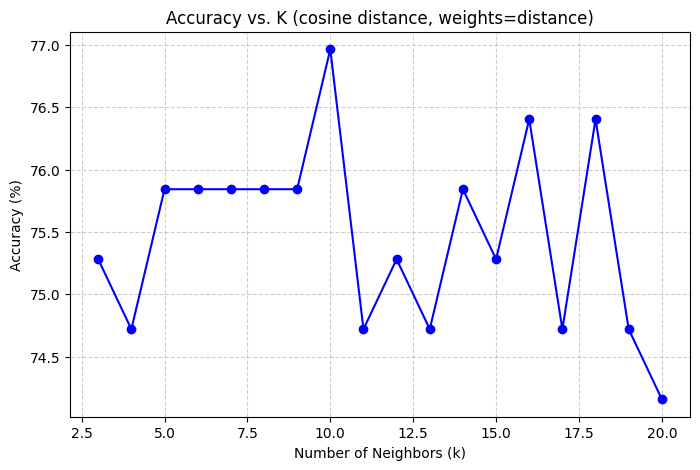

In [ ]:
plot_different_k(3,20, distance="cosine", weights="distance")

In [ ]:



predictions = Y_predicted.copy()
predictions = pd.DataFrame(predictions)

predictions.insert(0, "PassengerId", ids)
predictions.columns = ["PassengerId", "Survived"]
predictions.to_csv("submission.csv", index=False)